In [2]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv('C:/Users/Dhanush/Desktop/WineQT.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [5]:
def reg1(a,b):
    meanofx = sum(a)/len(a);
    meanofy = sum(b)/len(b);
    suma=[]
    for n1,n2 in zip(a,b):
        suma.append(n1*n2)
    sumofxy = sum(suma)
    suma1=[]
    for i1,i2 in zip(a,a):
        suma1.append(i1*i2)
    sumofxx = sum(suma1)
    b1 = (sumofxy -(len(a)*meanofx*meanofy))/(sumofxx - (len(a)*meanofx*meanofx))
    b0 = meanofy - (b1*meanofx)
    predy=[]
    tss=[]
    sse=[]
    for i in range(0,len(a)):
        predy.append(b0+b1*a[i])
        tss.append((b[i]-meanofy)**2)
        sse.append((b[i]-predy[i])**2)
    #print("ycap",predy)   
    #print('tss:',TSS)
    #print('sse:',SSE)
    SSE=sum(sse)
    TSS=sum(tss)
    r2=1-(SSE/TSS)
    return r2

    


y = df['quality'].tolist()
x1= df['fixed acidity'].tolist()
x2= df['volatile acidity'].tolist()
x3= df['citric acid'].tolist()
x4= df['residual sugar'].tolist()
x5= df['pH'].tolist()
    
    
    

a=reg1(x1,y)
b=reg1(x2,y)
c=reg1(x3,y)
d=reg1(x4,y)
e=reg1(x5,y)



print("r2ofenergy",reg1(x1,y))
print("r2ofliveness",reg1(x2,y))
print("r2ofspeechiness",reg1(x3,y))
print("r2ofacousticness",reg1(x4,y))
print("r2ofinstrumentalness",reg1(x5,y))
print("highest r2 is energy",max(a,b,c,d,e))


r2ofenergy 0.014876705268943469
r2ofliveness 0.16596947437286713
r2ofspeechiness 0.05799467560426963
r2ofacousticness 0.0004840849492457888
r2ofinstrumentalness 0.002751320708441529
highest r2 is energy 0.16596947437286713


In [7]:
def reg2(a,b,c):
    meanofx1 = sum(a)/len(a);
    meanofx2 = sum(b)/len(b);
    meanofy = sum(c)/len(c);
    
    def summa(x,y):
        summ=[]
        for i1,i2 in zip(x,y):
            summ.append(i1*i2)
        return sum(summ)

    x11 = summa(a,a)-(sum(a)*sum(a))/len(a)
    x22 = summa(b,b)-(sum(b)*sum(b))/len(b)
    x1y = summa(a,c)-(sum(a)*sum(c))/len(a)
    x2y = summa(b,c)-(sum(b)*sum(c))/len(a)
    x1x2 = summa(a,b)-(sum(a)*sum(b))/len(a)

    b1 = ((x22*x1y)-(x1x2*x2y))/((x11*x22)-(x1x2*x1x2))
    b2 = ((x11*x2y)-(x1x2*x1y))/((x11*x22)-(x1x2*x1x2))
    b0 = meanofy -(b1*meanofx1)-(b2*meanofx2)
    predy =[]
    tss =[]
    sse =[]
    for i in range(0,len(a)):
        predy.append(b0+b1*a[i]+b2*b[i])
        tss.append((c[i]-meanofy)**2)
        sse.append((c[i]-predy[i])**2)
    #print("ycap",predy)   
    #print('tss:',TSS)
    #print('sse:',SSE)
    SSE=sum(sse)
    TSS=sum(tss)
    r2=1-(SSE/TSS)
    return r2
a1=reg2(x2,x1,y)
b1=reg2(x2,x3,y)
c1=reg2(x2,x4,y)
d1=reg2(x2,x5,y)


print("r2ofenergy and liveness",a1)
print("r2ofenergy and speechiness",b1)
print("r2ofenergy and acousticness",c1)
print("r2ofenergy and instrumentalness",d1)
print("highest r2 energy and speechiness",max(a1,b1,c1,d1))

r2ofenergy and liveness 0.16638887052012075
r2ofenergy and speechiness 0.16648900080720463
r2ofenergy and acousticness 0.16635596229995908
r2ofenergy and instrumentalness 0.16747053107891097
highest r2 energy and speechiness 0.16747053107891097


In [9]:

b = {'a':df['volatile acidity'],'b':df['pH'],'c':df['fixed acidity']}
e = {'a':df['quality']}
y = pd.DataFrame(e)
c = pd.DataFrame(b)

In [10]:
import numpy as np
def beta(x,y):
    xtra = np.transpose(x)
    xxtra = np.dot(xtra,x)
    xxtrainv = np.linalg.inv(xxtra)
    yxtra = np.dot(xtra,y)
    beta = np.dot(xxtrainv,yxtra)
    return beta
def b00(x,y,z,x1,x2,x3):
    a = beta(x,y)
    b=sum(z)/len(z)
    c=sum(x1)/len(y)
    d=sum(x2)/len(y)
    e=sum(x3)/len(y)
    b0 = b-(a[0]*c)-(a[1]*d)-(a[2]*e)
    predy=[]
    tss=[]
    sse=[]
    
    for i in range(0,len(x)):
        predy.append(b0+a[0]*x1[i]+a[1]*x2[i]+a[2]*x3[i])
        tss.append((z[i]-b)**2)
        sse.append((z[i]-predy[i])**2)
    #print("ycap",predy)   
    #print('tss:',TSS)
    #print('sse:',SSE)
    SSE=sum(sse)
    TSS=sum(tss)
    r2=1-(SSE/TSS)
    return r2
def regqua(x,y,z,x1,x2,x3):
     a=beta(x,y)
     b=sum(z)/len(z)
     c=sum(x1)/len(y)
     d=sum(x2)/len(y)
     e=sum(x3)/len(y)
     b0=b-(a[0]*c)-(a[1]*d)-(a[2]*e)
     print('Reg Equation :',b0," +",a[0],"x1 +",a[1],'x2 +',a[2],'x3')

In [11]:
Y = df['quality'].tolist()
x1= df['fixed acidity'].tolist()
x2= df['volatile acidity'].tolist()
x3= df['citric acid'].tolist()
x4= df['residual sugar'].tolist()
x5= df['pH'].tolist()
print(beta(c,Y))
print("r2value",b00(c,y,Y,x1,x2,x3))
regqua(c,y,Y,x1,x2,x3)

[-1.78172085  1.68059388  0.12455923]
r2value [-16.86052948]
Reg Equation : [19.53873128]  + [-1.78172085] x1 + [1.68059388] x2 + [0.12455923] x3


In [22]:
import sklearn.cluster as cluster

In [23]:
kmeans = cluster.KMeans(n_clusters=5 ,init="k-means++")
kmeans = kmeans.fit(df[['fixed acidity','pH']])

In [24]:
kmeans.cluster_centers_

array([[ 7.44761905,  3.34411905],
       [10.25882353,  3.19052288],
       [12.45529412,  3.11694118],
       [ 8.69072165,  3.26790378],
       [ 6.25927835,  3.48407216]])

In [25]:
df['Clusters'] = kmeans.labels_

In [26]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,Clusters
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4,0


In [27]:
df['Clusters'].value_counts()

0    420
3    291
4    194
1    153
2     85
Name: Clusters, dtype: int64

In [28]:
df.to_csv('WineQT.csv', index = False)

<AxesSubplot:xlabel='fixed acidity', ylabel='pH'>

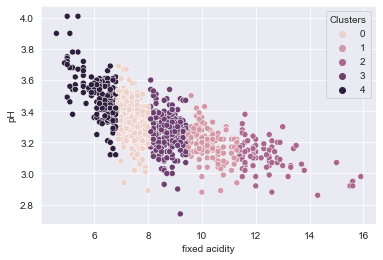

In [29]:
sns.scatterplot(x="fixed acidity", y="pH",hue = 'Clusters',  data=df)